In [230]:
import numpy as np
import pandas as pd
from keras import Sequential  # 모댈 객체
from keras.layers import Dense, Dropout, Flatten  # layer 객체
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.utils import plot_model
import matplotlib.pyplot as plt

# [1] 데이터 로딩

In [231]:
# 데이터 로딩
df = pd.read_csv(r'../data/diabetes.csv')
df.drop(['BloodPressure', 'SkinThickness'], inplace=True, axis=1)
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

# [2] 전처리

In [232]:
# 상관관계 분석 후 관계가 떨어지는 특성 배제
pd.DataFrame.corr(df)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.331357,0.221071,0.137337,0.263514,0.466581
Insulin,-0.073535,0.331357,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.130548,0.292695,0.173844,0.238356,1.000000


In [233]:
# 스케일링
scaler = StandardScaler()
scaler.fit(data[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
scaler.transform(data[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
#
# # 원 핫 인코딩
# encoder = OneHotEncoder()
# encoder.fit([data['Pregnancies']])
# pd.concat([data, pd.DataFrame(encoder.transform([data['Pregnancies']]))], axis=1)

array([[ 0.84832379, -0.69289057,  0.20401277,  0.46849198,  1.4259954 ],
       [-1.12339636, -0.69289057, -0.68442195, -0.36506078, -0.19067191],
       [ 1.94372388, -0.69289057, -1.10325546,  0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.27959377, -0.73518964, -0.68519336, -0.27575966],
       [ 0.1597866 , -0.69289057, -0.24020459, -0.37110101,  1.17073215],
       [-0.8730192 , -0.69289057, -0.20212881, -0.47378505, -0.87137393]])

# [2] 학습 / 테스트 / 검증용 데이터 분리

In [234]:
# 학습, 테스트용 데이터셋 준비
x_train, x_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [235]:
# 검증용 데이터셋 준비
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [236]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [237]:
x_train.shape

(491, 6)

# [3] 모델 구성

In [238]:
# Sequential 생성
model = Sequential(name='Sigmoid_Model')

In [239]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화 함수, (옵션 : input_shape param)
model.add(Dense(500, activation='relu', input_shape=(6,), name='input'))
# model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(500, activation='relu', name='hidden_1'))
# model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(1, activation='sigmoid', name='output'))

In [240]:
model.summary()

Model: "Sigmoid_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 500)               3500      
                                                                 
 hidden_1 (Dense)            (None, 500)               250500    
                                                                 
 output (Dense)              (None, 1)                 501       
                                                                 
Total params: 254,501
Trainable params: 254,501
Non-trainable params: 0
_________________________________________________________________


# [4] 모델 생성

In [241]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [242]:
model_hist = model.fit(x_train.reshape(-1, 6),
                       y_train,
                       epochs=100,
                       validation_data=(x_val.reshape(-1, 6), y_val))

Epoch 1/100
16/16 [==============================] - 1s 11ms/step - loss: 3.0923 - accuracy: 0.5642 - val_loss: 1.7796 - val_accuracy: 0.6585
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1.8181 - accuracy: 0.5193 - val_loss: 0.9540 - val_accuracy: 0.5772
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.2993 - accuracy: 0.5723 - val_loss: 1.2998 - val_accuracy: 0.5285
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8156 - accuracy: 0.6314 - val_loss: 0.7286 - val_accuracy: 0.6260
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8321 - accuracy: 0.6334 - val_loss: 0.7508 - val_accuracy: 0.5366
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7556 - accuracy: 0.6130 - val_loss: 0.6965 - val_accuracy: 0.5447
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.6477 - val_loss: 0.9241 - val_accuracy: 0.6179
Epoch 8/100


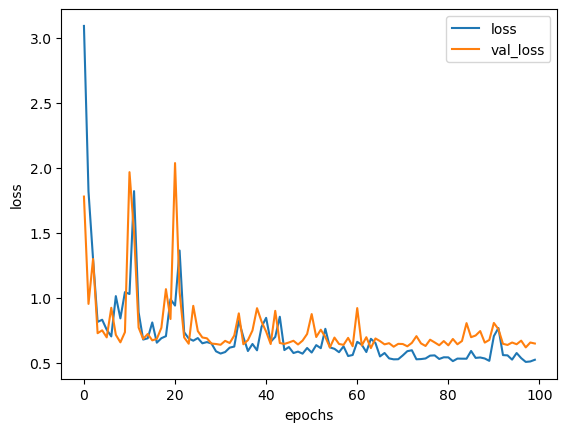

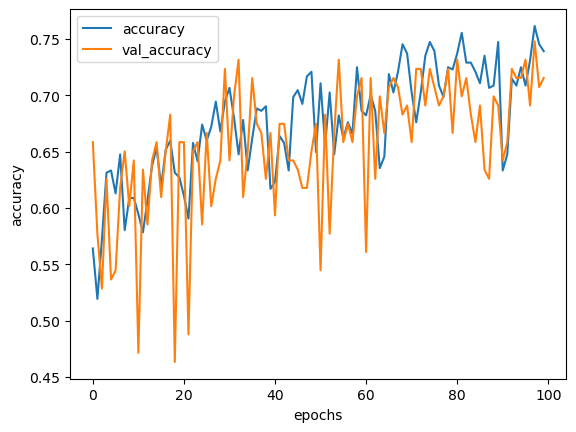

In [243]:
plt.plot(model_hist.epoch, model_hist.history['loss'], label='loss')
plt.plot(model_hist.epoch, model_hist.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(model_hist.epoch, model_hist.history['accuracy'], label='accuracy')
plt.plot(model_hist.epoch, model_hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()